# Fandango Conflict of Intrest Data Analysis
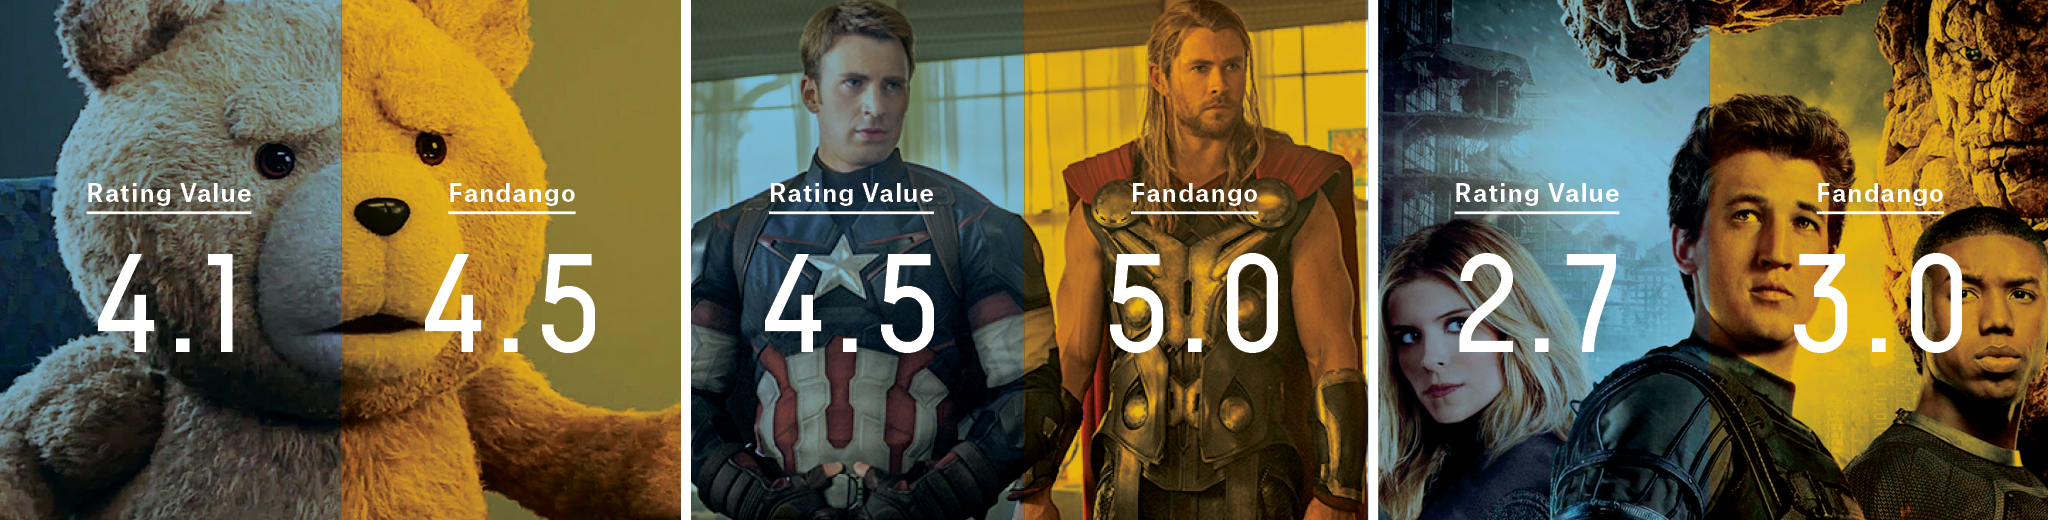
### Objective: 
- Determine if Fandango is inflating their reviews in order to drive profits
- Do an Exploratory Data Analysis (EDA) to determine it

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.
#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [2]:
# Import important libraries for EDA 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Exploring the relationship between popularity of a film and its rating.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

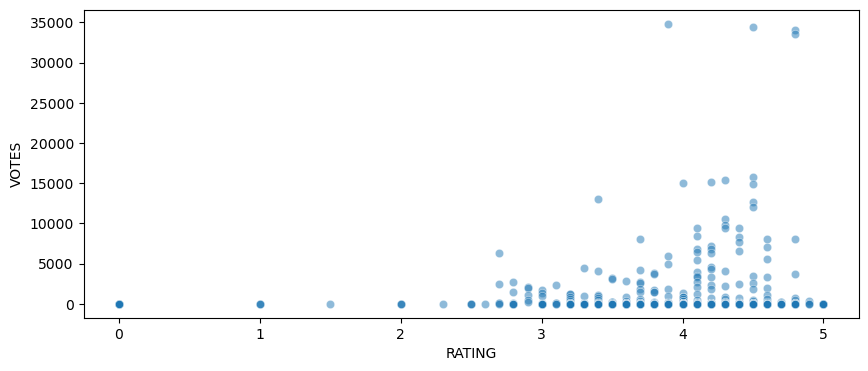

In [6]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='RATING',y='VOTES', data=fandango,alpha=0.5) #higher rated mvies 4.1 or 4.9 seem to have a bigger number of votes

In [7]:
fandango.corr() # In theory Stars and Rating should provide as close as possible to one another

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)

In [9]:
# Extract the Year from each movie 
fandango['YEAR']= fandango['FILM'].str.split(' ').str[-1].str.strip('()')
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Question: How many movies are in the Fandango DataFrame per year?**

In [11]:
fandango['YEAR'].value_counts() # 3 ouliers and most of this dataset was webscraped in 2015

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Figure size 200x200 with 0 Axes>

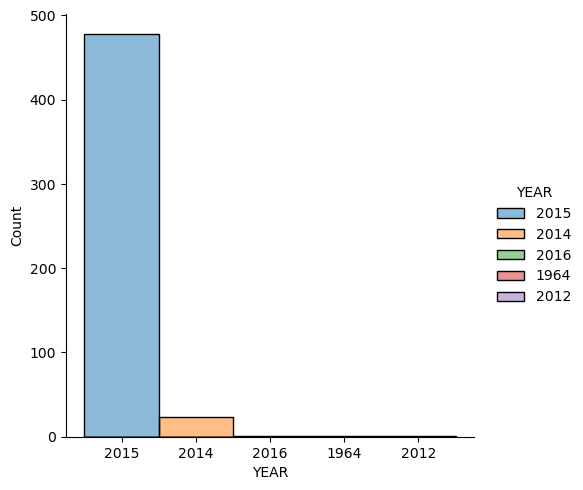

In [13]:
plt.figure(figsize=(2,2))
sns.displot(data=fandango,x='YEAR',hue='YEAR')

**Question: What are the 10 movies with the highest number of votes?**

In [14]:
fandango.sort_values('VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Question: How many movies have zero votes?**

In [16]:
(fandango['VOTES']==0).sum()

69

Filterning non reviewed Movies

In [17]:
df = fandango[fandango['VOTES']>0]

In [18]:
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. 
Let's visualize this difference in distributions.**


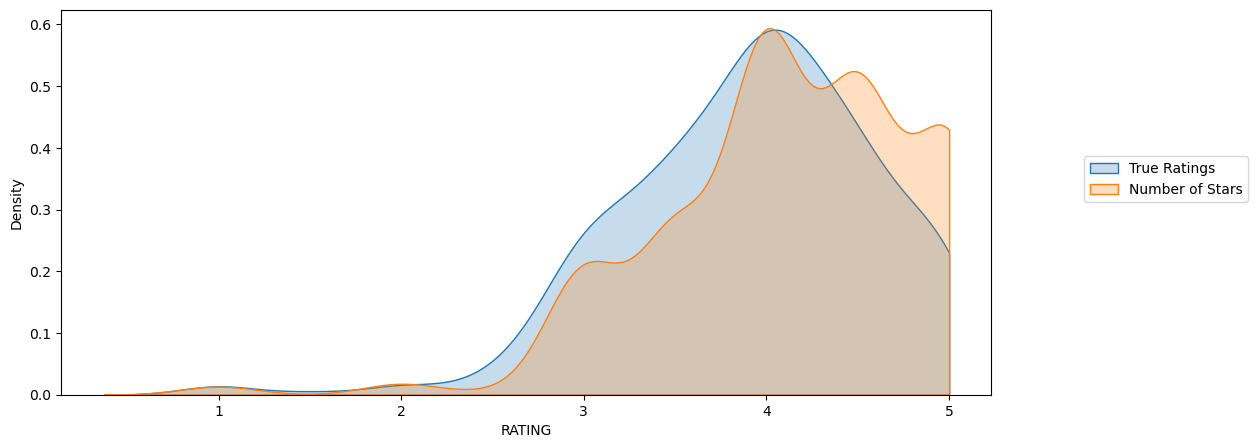

In [20]:
fig, axs = plt.subplots(figsize=(12,5))
sns.kdeplot(data=df,x='RATING',ax=axs, fill='True',label='True Ratings',clip=[0,5])
sns.kdeplot(data=df,x='STARS',ax=axs, fill='True',label='Number of Stars',clip=[0,5])
plt.legend(loc=(1.1,0.5))


As we can see from the plot above, the Number of stars atribuited on the website is much higher than the true ratings users gave. What seems to be happening is that **Fandengo is rounding up their reviews**

**Let's now actually quantify this discrepancy.**

/tmp/ipykernel_11241/2973639742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARS_DIFF'] = round(df['STARS'] - df['RATING'],1)


<AxesSubplot:xlabel='STARS_DIFF', ylabel='Density'>

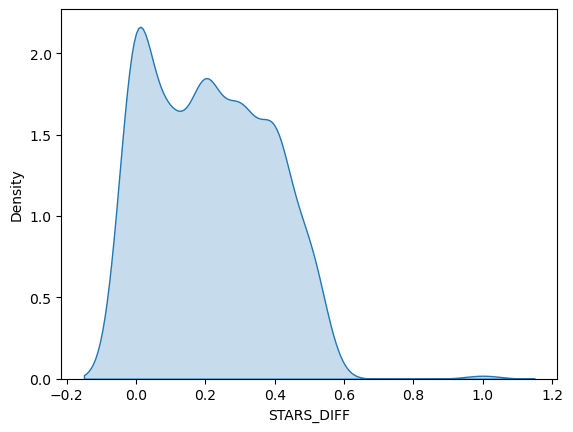

In [21]:
df['STARS_DIFF'] = round(df['STARS'] - df['RATING'],1)
sns.kdeplot(data=df,x='STARS_DIFF',fill=True)

As we can see there are plenty of movies with inflated reviews , namely rounding up from 0.2-0.4

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

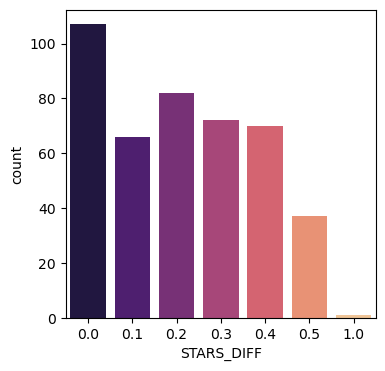

In [22]:
# To check how many times each rounding happends
figure2= plt.figure(figsize=(4,4))
sns.countplot(data=df,x='STARS_DIFF',palette='magma')

**Question: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [23]:
df[df['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [24]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [25]:
# Explore data
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [27]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

<AxesSubplot:xlabel='RottenTomatoes_User', ylabel='RottenTomatoes'>

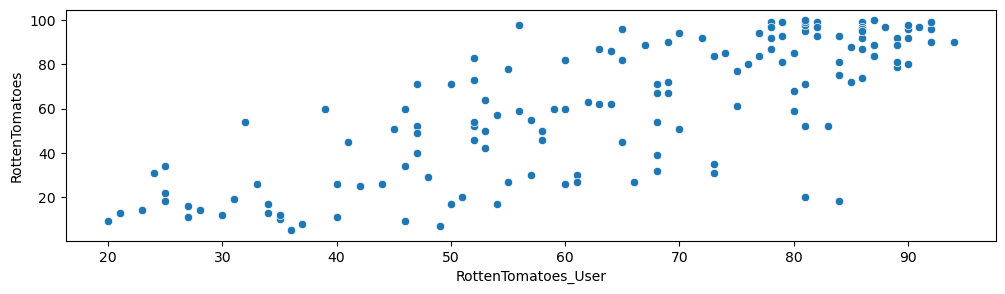

In [29]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=all_sites,x='RottenTomatoes_User',y='RottenTomatoes') # Users seem to vote a bit higher than critics for some movies

Let's quantify this difference by comparing the critics ratings and the RT User ratings. 

Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users.

In [30]:
#CODE HERE
all_sites['rot-diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'] 
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rot-diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [32]:
# Average Difference of Rotten Critics vs Users
abs(all_sites['rot-diff']).mean()

15.095890410958905

<Figure size 1000x400 with 0 Axes>

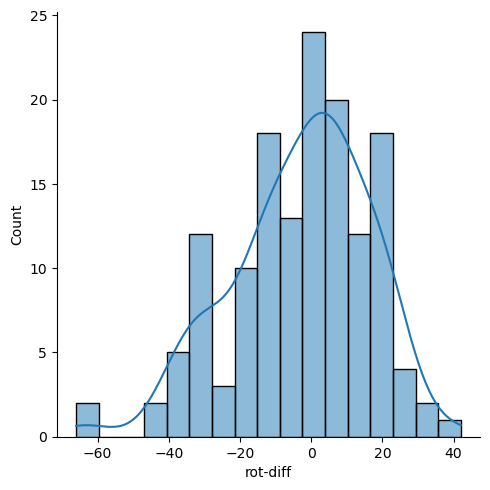

In [36]:
plt.figure(figsize=(10,4))
sns.displot(data=all_sites,x='rot-diff',kde=True,bins=17) # In general I Users give a slightly better ratting than Critics
# We can see this by the area bellow left of zero

**Lets see a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, 'Absolute difference between critics and users of RottenTomatoes')

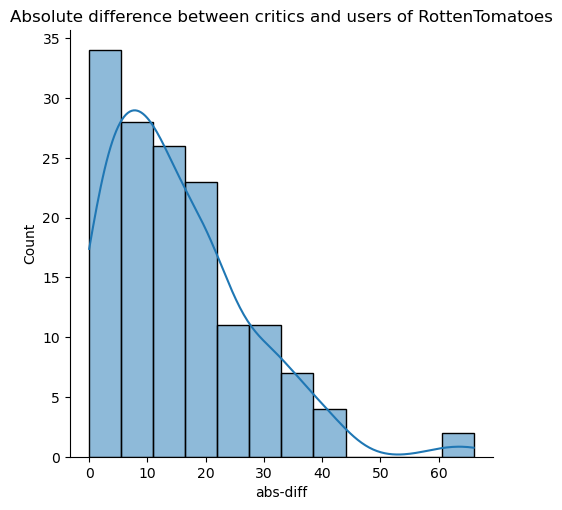

In [35]:
all_sites['abs-diff'] = abs(all_sites['rot-diff'])
sns.displot(data=all_sites, x='abs-diff',kde=True)
plt.title('Absolute difference between critics and users of RottenTomatoes')

**Let's find out which movies are causing the largest differences.**

**Question: What are the top 5 movies users rated higher than critics on average:**

In [37]:
all_sites.sort_values('rot-diff',ascending=True)[:5][['FILM','rot-diff']]

,FILM,rot-diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Question: What are the top 5 movies critics scores higher than users on average.**

In [39]:
all_sites.sort_values('rot-diff',ascending=False)[:5][['FILM','rot-diff']]

,FILM,rot-diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

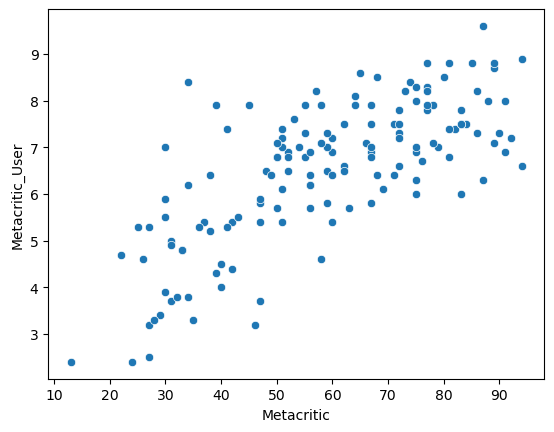

In [41]:
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User') # Users seem to vote a bit higher than critics for some movies

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.



<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

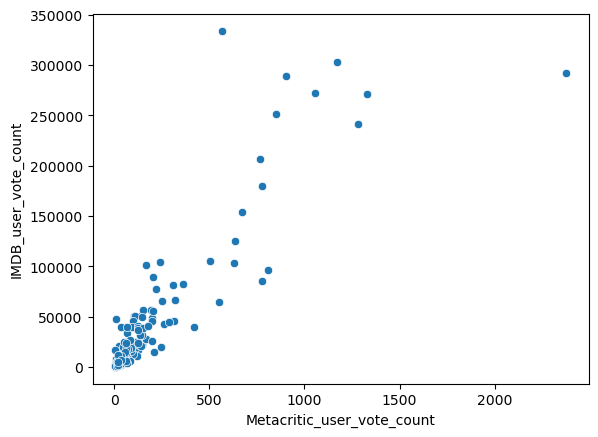

In [43]:
all_sites
sns.scatterplot(data=all_sites,x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count') # Some outliers

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**Question: What movie has the highest IMDB user vote count?**

In [44]:
all_sites.iloc[all_sites['IMDB_user_vote_count'].argmax()]


FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
rot-diff                                             -2
abs-diff                                              2
Name: 14, dtype: object

**Question: What movie has the highest Metacritic User Vote count?**

In [45]:
#all_sites.iloc[all_sites['Metacritic_user_vote_count'].argmax()]
all_sites.sort_values('Metacritic_user_vote_count',ascending=False)[:1]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rot-diff,abs-diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [46]:
df = pd.merge(fandango,all_sites,how='inner',on='FILM') # Merge two tables inner on Film since its the connection idx

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  rot-diff                    145 non-null    int64  
 13  abs-diff                    145 non

In [48]:
df.describe()

,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rot-diff,abs-diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,15.186207
std,0.541169,0.502437,6368.668671,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,12.106579
min,3.000000,2.700000,35.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,0.000000
25%,3.500000,3.500000,218.000000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,6.000000
50%,4.000000,3.900000,1430.000000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,12.000000
75%,4.500000,4.200000,4279.000000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,21.000000
max,5.000000,4.800000,34846.000000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,66.000000


In [49]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rot-diff,abs-diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [50]:
# CODE HERE
df['norm_RottenTomatoes'] = round(df['RottenTomatoes'] /20,1)
df['norm_RottenTomatoes_User'] = round(df['RottenTomatoes_User'] / 20,1)
df['norm_IMDB'] = round(df['IMDB']/2,1)
df['norm_Metacritic'] = round(df['Metacritic'] / 20,1)
df['norm_Metacritic_User'] = round(df['Metacritic_User'] / 2,1)
df


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rot-diff,abs-diff,norm_RottenTomatoes,norm_RottenTomatoes_User,norm_IMDB,norm_Metacritic,norm_Metacritic_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.1,2.3,1.6
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.0,3.6,3.0,3.5
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.7,3.6,3.3
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.0,4.2,3.7,3.4,3.4
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.3,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24,4.4,3.2,3.4,3.4,3.2
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14,4.8,4.0,3.5,4.4,3.2
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9,4.6,4.2,3.9,3.4,3.5
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9,4.8,4.3,3.7,4.3,3.6


In [51]:
#Normalized Frame
df_norm = df[['STARS','RATING','norm_RottenTomatoes','norm_RottenTomatoes_User','norm_Metacritic',
              'norm_Metacritic_User','norm_IMDB']]

In [53]:
df_norm.head()

,STARS,RATING,norm_RottenTomatoes,norm_RottenTomatoes_User,norm_Metacritic,norm_Metacritic_User,norm_IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


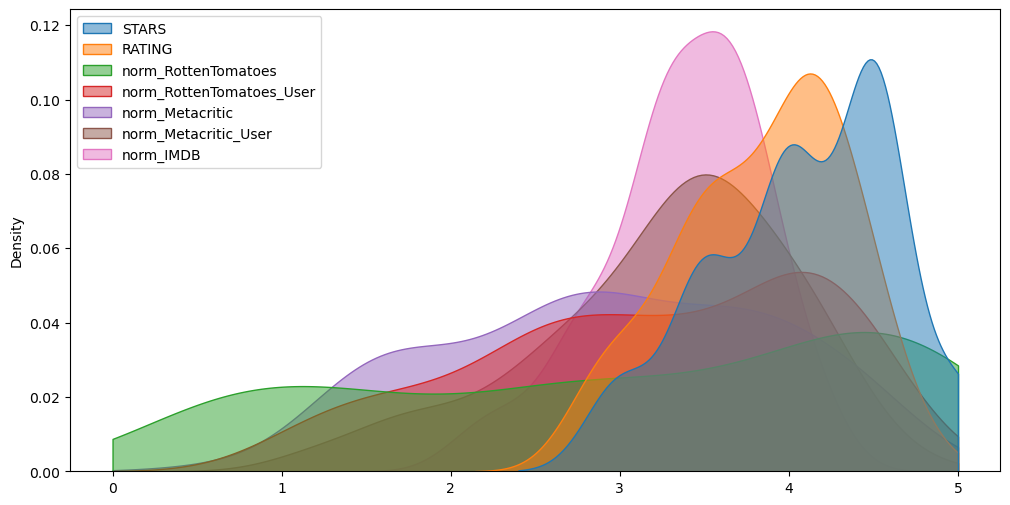

In [55]:
fig,ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=df_norm,fill=True,alpha=0.5,clip=[0,5])
sns.move_legend(ax, loc='upper left')


The Stars and Ratings from Fandango are clearly inflated in comparision to the rest of the websites. It's worth noting that most of them follow a more or less flat distribution while IMDB offers a more gaussian styled distribution centered at 3.5. Which makes sence since most movies are "normal" and with exception good and bad movies. As oposed to rotten tomatoes more uniform distribution. 



**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 


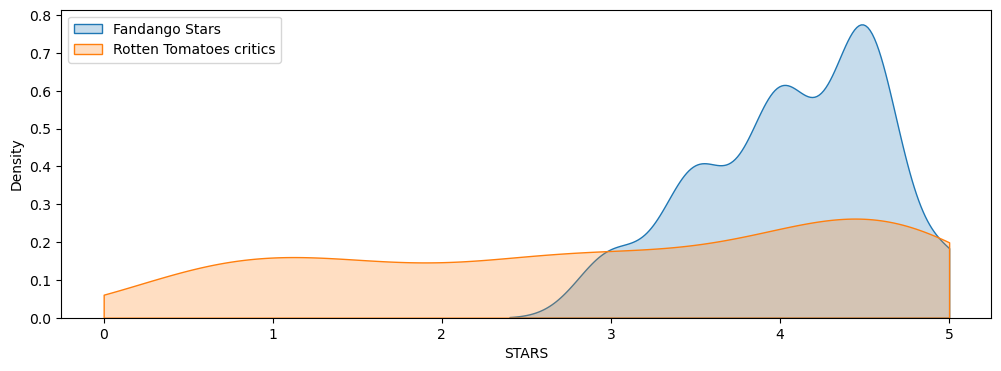

In [57]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=df,x='STARS',clip=[0,5],fill=True, label='Fandango Stars')
sns.kdeplot(data=df,x='norm_RottenTomatoes', clip= [0,5], fill=True, label='Rotten Tomatoes critics')
plt.legend(loc=2)

**Conclusion. Yes Fandango has a conflict of intrests and is inflating their reviews. There are no "Bad movies" in Fandango**

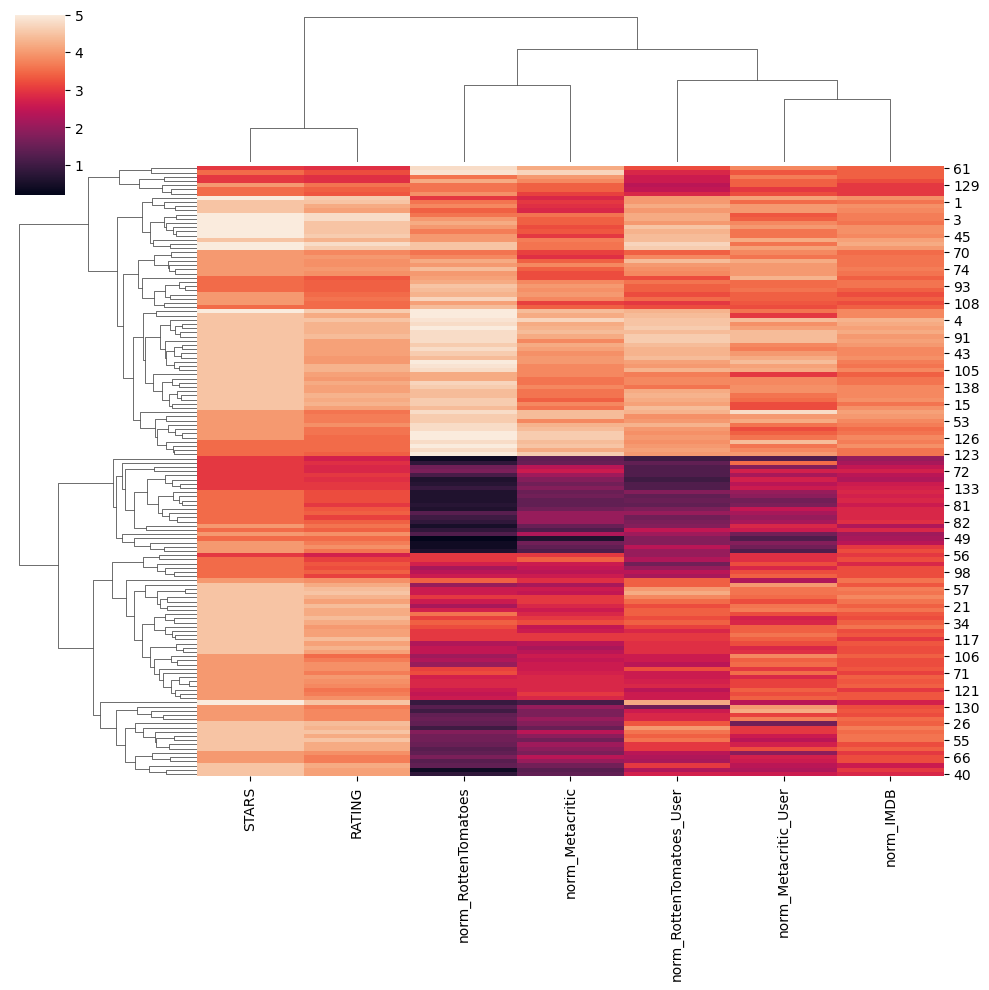

In [58]:
# Aditional Analysis 
sns.clustermap(data=df_norm)


As we can see by the bright colors of STARS and RATINGS, Fandango doesn't have "Bad movies" in comparision to the other review providers.

## Checking the Worst Movies contrast

In [59]:
worst_movies = df[['FILM','STARS','RATING','norm_RottenTomatoes','norm_RottenTomatoes_User','norm_Metacritic','norm_Metacritic_User','norm_IMDB']]
worst_movies = worst_movies.nsmallest(10,'norm_RottenTomatoes')

In [60]:
worst_movies

,FILM,STARS,RATING,norm_RottenTomatoes,norm_RottenTomatoes_User,norm_Metacritic,norm_Metacritic_User,norm_IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


<AxesSubplot:ylabel='Density'>

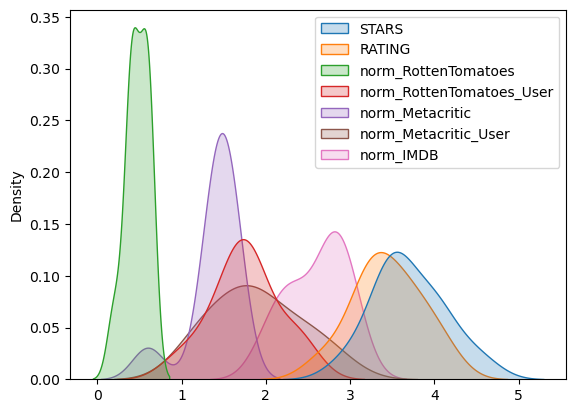

In [61]:
sns.kdeplot(data=worst_movies,fill=True)

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts:Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [65]:
worst_movies.loc[25]

FILM                        Taken 3 (2015)
STARS                                  4.5
RATING                                 4.1
norm_RottenTomatoes                    0.4
norm_RottenTomatoes_User               2.3
norm_Metacritic                        1.3
norm_Metacritic_User                   2.3
norm_IMDB                              3.0
Name: 25, dtype: object